In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import urllib.request
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [214]:
url = "https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/play_by_play_data/regular_season/reg_pbp_2019.csv"

In [215]:
data = pd.read_csv(url)

In [216]:
pd.options.mode.chained_assignment = None

In [217]:
data = data.loc[
    (data['epa'].notnull()) &
    ((data['play_type'] == 'no_play') |
    (data['play_type'] == 'pass') |
    (data['play_type'] == 'run'))
]

In [218]:
data.drop(data[(data['replay_or_challenge'] == 0) & (data['desc'].str.contains('Timeout'))].index, inplace=True)

In [219]:
data = data.loc[data.desc.str.contains('kneels|spiked') == False]

In [220]:
data.reset_index(drop=True, inplace=True)

In [221]:
data.insert(69, 'home_off_success', 0)

In [222]:
data.loc[data['epa'] > 0, 'home_off_success'] = 1

In [223]:
data.insert(70, 'home_off_epa', 0)

In [224]:
data['home_off_epa'] = data['epa']

In [225]:
data.insert(71, 'away_off_success', 0)

In [226]:
data.loc[(data.play_type!='no_play') & (data.posteam==data.home_team)].groupby(['posteam'])[['home_off_epa', 'home_off_success']].mean()

,home_off_epa,home_off_success
posteam,,
ARI,-0.033014,0.423077
ATL,0.162355,0.389831
BAL,0.114652,0.428571
BUF,-0.022346,0.464789
CAR,-0.160718,0.392593
CHI,-0.318595,0.323077
CIN,-0.038795,0.328125
CLE,-0.229953,0.412698
DAL,0.404231,0.536000


In [227]:
data.loc[data['epa'] > 0, 'away_off_success'] = 1

In [228]:
data.insert(72, 'away_off_epa', 0)

In [229]:
data['away_off_epa'] = data['epa']

In [230]:
data.loc[(data.play_type!='no_play') & (data.posteam==data.away_team)].groupby(['posteam'])[['away_off_epa', 'away_off_success']].mean()

,away_off_epa,away_off_success
posteam,,
ARI,0.073842,0.388889
ATL,0.137108,0.483607
BAL,0.383906,0.480263
BUF,0.056961,0.436508
CAR,0.303527,0.438596
CHI,0.062780,0.421053
CIN,-0.084392,0.368000
CLE,-0.040339,0.327586
DAL,0.312292,0.546875


In [231]:
data.insert(73, 'home_def_success', 0)

In [232]:
data.loc[data['epa'] > 0, 'home_def_success'] = 1

In [233]:
data.insert(74, 'home_def_epa', 0)

In [234]:
data['home_def_epa'] = data['epa']

In [235]:
data.loc[(data.play_type!='no_play') & (data.defteam==data.home_team)].groupby(['defteam'])[['home_def_epa', 'home_def_success']].mean()

,home_def_epa,home_def_success
defteam,,
ARI,0.166691,0.447761
ATL,-0.025009,0.369863
BAL,0.073842,0.388889
BUF,-0.152228,0.345455
CAR,-0.004781,0.436508
CHI,-0.232155,0.309091
CIN,0.425030,0.560606
CLE,0.060743,0.435897
DAL,-0.030698,0.458647


In [236]:
data.insert(75, 'away_def_success', 0)

In [237]:
data.loc[data['epa'] > 0, 'away_def_success'] = 1

In [238]:
data.insert(76, 'away_def_epa', 0)

In [239]:
data['away_def_epa'] = data['epa']

In [240]:
data.loc[(data.play_type!='no_play') & (data.defteam==data.away_team)].groupby(['defteam'])[['away_def_epa', 'away_def_success']].mean()

,away_def_epa,away_def_success
defteam,,
ARI,0.114652,0.428571
ATL,0.293668,0.481132
BAL,0.077578,0.439252
BUF,-0.041781,0.465649
CAR,-0.026914,0.465753
CHI,-0.038360,0.441379
CIN,-0.086169,0.418803
CLE,-0.320117,0.293103
DAL,0.094159,0.444444


In [241]:
data.insert(77, 'success', 0)

In [242]:
data.loc[data['epa'] > 0, 'success'] = 1

In [243]:
def getImage(path): 
    return OffsetImage(plt.imread(path), zoom=1)

In [244]:
logos = os.listdir(os.getcwd() + '\\logos\\')

logo_paths = []

for i in logos:
    logo_paths.append(os.getcwd() + '\\logos\\' + str(i))

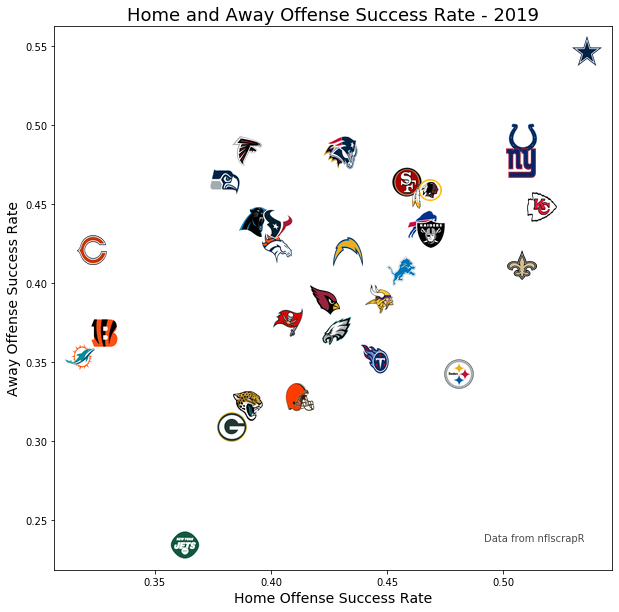

In [249]:
#Make x and y variables for success rate data
x = data.loc[(data.play_type!='no_play') & (data.posteam==data.home_team)].groupby(by='posteam')[['home_off_success']].mean().home_off_success.values
y = data.loc[(data.play_type!='no_play') & (data.posteam==data.away_team)].groupby(by='posteam')[['away_off_success']].mean().away_off_success.values

#Create a figure with size 10x10
fig, ax = plt.subplots(figsize=(10,10))

#Make a scatter plot with success rate data
ax.scatter(x, y, s=.001)

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)

    #Adding labels and text
ax.set_xlabel('Home Offense Success Rate', fontsize=14)
ax.set_ylabel('Away Offense Success Rate', fontsize=14)
ax.set_title('Home and Away Offense Success Rate - 2019', fontsize=18)
ax.text(.95, .05, 'Data from nflscrapR', fontsize=10, alpha=.7, horizontalalignment='right',  verticalalignment='bottom', transform=ax.transAxes)

#Save the figure as a png
plt.savefig('2019-home-away-success.png', dpi=400)

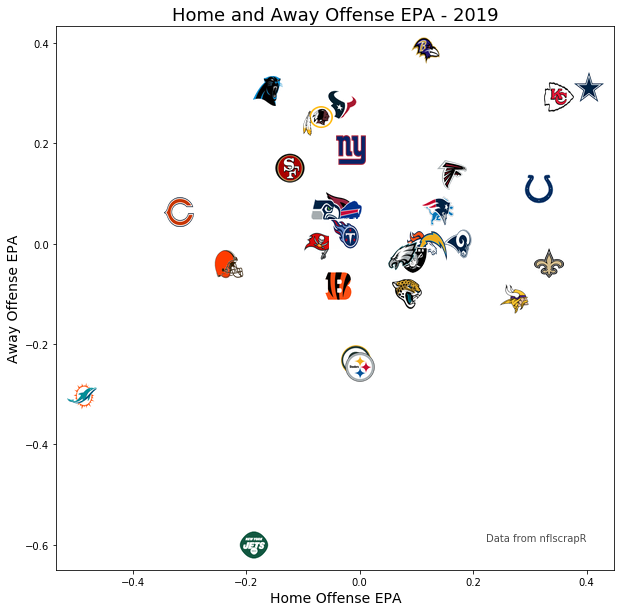

In [246]:
#Make x and y variables for success rate data
x = data.loc[(data.play_type!='no_play') & (data.posteam==data.home_team)].groupby(by='posteam')[['epa']].mean().epa.values
y = data.loc[(data.play_type!='no_play') & (data.posteam==data.away_team)].groupby(by='posteam')[['epa']].mean().epa.values

#Create a figure with size 10x10
fig, ax = plt.subplots(figsize=(10,10))

#Make a scatter plot with success rate data
ax.scatter(x, y, s=.001)

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)

    #Adding labels and text
ax.set_xlabel('Home Offense EPA', fontsize=14)
ax.set_ylabel('Away Offense EPA', fontsize=14)
ax.set_title('Home and Away Offense EPA - 2019', fontsize=18)
ax.text(.95, .05, 'Data from nflscrapR', fontsize=10, alpha=.7, horizontalalignment='right',  verticalalignment='bottom', transform=ax.transAxes)

#Save the figure as a png
plt.savefig('2019-offense-home-away-epa.png', dpi=400)

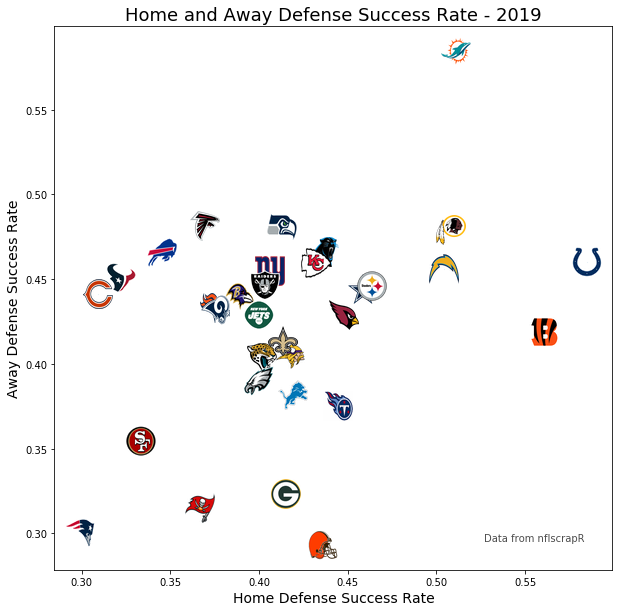

In [247]:
#Make x and y variables for success rate data
x = data.loc[(data.play_type!='no_play') & (data.defteam==data.home_team)].groupby(by='defteam')[['success']].mean().success.values
y = data.loc[(data.play_type!='no_play') & (data.defteam==data.away_team)].groupby(by='defteam')[['success']].mean().success.values

#Create a figure with size 10x10
fig, ax = plt.subplots(figsize=(10,10))

#Make a scatter plot with success rate data
ax.scatter(x, y, s=.001)

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)

    #Adding labels and text
ax.set_xlabel('Home Defense Success Rate', fontsize=14)
ax.set_ylabel('Away Defense Success Rate', fontsize=14)
ax.set_title('Home and Away Defense Success Rate - 2019', fontsize=18)
ax.text(.95, .05, 'Data from nflscrapR', fontsize=10, alpha=.7, horizontalalignment='right',  verticalalignment='bottom', transform=ax.transAxes)

#Save the figure as a png
plt.savefig('2019-defense-home-away-success.png', dpi=400)

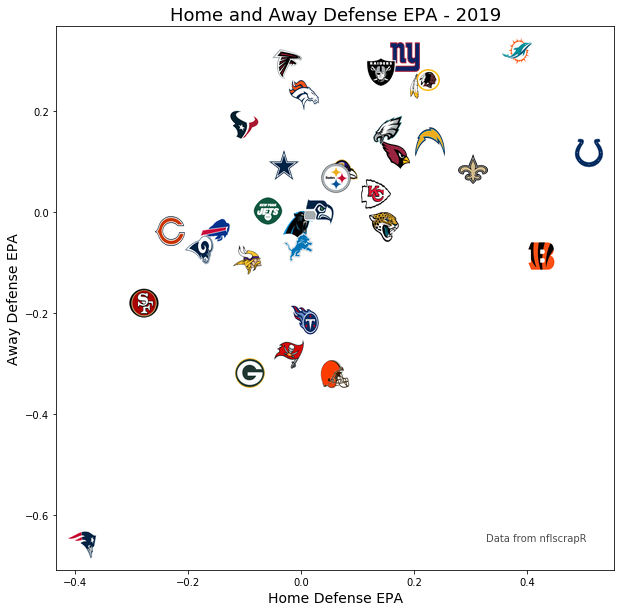

In [248]:
#Make x and y variables for success rate data
x = data.loc[(data.play_type!='no_play') & (data.defteam==data.home_team)].groupby(by='defteam')[['home_def_epa']].mean().home_def_epa.values
y = data.loc[(data.play_type!='no_play') & (data.defteam==data.away_team)].groupby(by='defteam')[['away_def_epa']].mean().away_def_epa.values

#Create a figure with size 10x10
fig, ax = plt.subplots(figsize=(10,10))

#Make a scatter plot with success rate data
ax.scatter(x, y, s=.001)

#Adding logos to the chart
for x0, y0, path in zip(x, y, logo_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)

    #Adding labels and text
ax.set_xlabel('Home Defense EPA', fontsize=14)
ax.set_ylabel('Away Defense EPA', fontsize=14)
ax.set_title('Home and Away Defense EPA - 2019', fontsize=18)
ax.text(.95, .05, 'Data from nflscrapR', fontsize=10, alpha=.7, horizontalalignment='right',  verticalalignment='bottom', transform=ax.transAxes)

#Save the figure as a png
plt.savefig('2019-defense-home-away-epatest.png', dpi=400)